# What is the Regression in ML?
***

이번 챕터부터는 **회귀(Regression)**에 대해서 알아보도록 하겠습니다. 회귀 분석은 분류와 달리 **연속형 숫자 값**을 예측하는 분석입니다. 예를들어 '아파트 브랜드', '아파트 방 개수', '아파트 주소', '주변 인프라 수' 등 여러 가지 요건(독립변수)들을 바탕으로 '아파트 가격(종속변수)'을 예측하는 분석은 회귀분석이라고 할 수 있습니다. ML에서 회귀의 핵심은 feature(독립변수)들의 **최적의 회귀계수**를 찾아내는 것입니다.

***

그렇다면 최적의 회귀 계수를 찾기 위해서는 어떤 과정을 거칠까요? 분류와 마찬가지로 회귀 역시 오류를 개선시키는 방향으로 회귀 계수를 갱신합니다. 회귀에서 오류(오차)는 **잔차**라고 하는데요. 최적의 회귀계수를 찾는다는 것은 결국 **잔차의 합**이 최소가 되는 모델을 만든다는 의미입니다. 실제로 모델의 성능(잔차의 합)을 평가하는 지표는 여러가지가 있는데 간단한 실습을 통해 살펴보겠습니다.

먼저 아파트 가격(y)이 면적(x) 요소 하나에만 영향을 받는다는 모델을 만들어보겠습니다. 

모델의 식은 y = 3.3 * x + 2(절편) 과 같으며 간단한 그래프와 함께 평가지표를 알아보겠습니다.

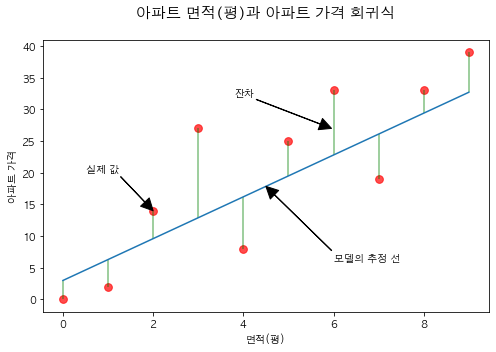

In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
import numpy as np

x = np.arange(0,10)
y = 3.3 * x + 3

real_price = [0, 2, 14, 27, 8, 25, 33, 19, 33, 39]

plt.figure(figsize = (8,5))
plt.title('아파트 면적(평)과 아파트 가격 회귀식\n', size = 15)
plt.plot(x, y)
plt.xlabel('면적(평)')
plt.ylabel('아파트 가격')
plt.scatter(x, real_price, color = 'r', alpha = .7, s = 60)

for i, v in enumerate(zip(x, y, real_price)) :
    plt.vlines(v[0],v[1], v[2], alpha = .5, color = 'g')

ar_pr = dict(facecolor = 'black', width = .3)
plt.annotate('잔차', xy = (5.95555, 27), xytext = (3.8, 32), fontsize = 10, arrowprops = ar_pr)
plt.annotate('모델의 추정 선', xy = (4.5, 4.5 * 3.3 + 3), xytext = (6, 6), fontsize = 10, arrowprops = ar_pr)
plt.annotate('실제 값', xy = (2, 14), xytext = (.5, 20), fontsize = 10, arrowprops = ar_pr)
plt.show()

코드가 조금 조잡(?)해보이지만 그래프 출력 결과만 봐주시길 바랍니다 ㅎㅎㅎ 우선 단일변수인 '아파트 면적(평)'만으로 '아파트 가격'을 예측하는 **회귀식(파란선)**을 그려보았습니다. **빨간점**은 **실제 값**이며 **초록색 선**은 **실제 값**으로부터 **회귀식**까지의 거리 즉 **잔차**의 크기를 나타낸 것입니다.

추정선과 실제값 사이의 거리가 가까울수록 잔차가 작다는 것을 의미하게 되겠죠? 지금은 독립변수 하나로 종속변수를 예측하여 위와 같이 일직선 상으로 회귀식이 도출되었습니다. 

먼저 아래는 회귀와 관련된 대표적인 평가지표입니다.

- MAE(Mean Absolute Error) : 실제 값과 예측 값의 차이를 절댓값으로 변환한 후 평균을 구한 것입니다.

- MSE(Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱하여 평균을 구한 것입니다.

- RMSE(Root Mean Squared Error) : MSE를 보완한 것으로 MSE에 루트를 씌운 것입니다.

- MAPE(Mean Absolute Percentage Error) : 실제 값과 예측 값의 차이가 예측 값에서 차지하는 비율을 나타낸 것입니다.

- MSLE(Mean Squared Log Error) : MSE에 로그를 씌운 것입니다.

- R2_score : 모델의 설명력을 의미하는 결정계수 입니다.

이제 실제 평가지표의 의미를 코드와 함께 살펴보겠습니다.

In [19]:
from sklearn.metrics \
import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [20]:
mape = mean_absolute_percentage_error(real_price, y)
mse = mean_squared_error(real_price, y)
mae = mean_absolute_error(real_price, y)
msle = mean_squared_log_error(real_price, y)
r2 = r2_score(real_price, y)

In [21]:
print(f'MAPE 값은 {round(mape, 5)}')
print(f'MSE 값은 {round(mse, 5)}')
print(f'RMSE 값은 {round(mse ** .5, 5)}')
print(f'MSLE 값은 {round(msle, 5)}')
print(f'MAE 값은 {round(mae, 5)}')
print(f'R2 값은 {round(r2, 5)}')

MAPE 값은 1351079888211149.2
MSE 값은 55.025
RMSE 값은 7.41788
MSLE 값은 0.4061
MAE 값은 6.67
R2 값은 0.67208


6가지 평가지표를 위에서 확인해보았습니다. 애초에 한개의 독립변수만으로 종속변수를 예측하는 문제이고 회귀 계수 또한 3.3으로 임의로 설정했기 때문에 모델에 대한 이해는 아직 하실 필요가 없습니다. 다만 잔차, 실제값, 예측값 등의 요소들로 다양한 평가지표로 모델의 성능을 확인할 수 있다는 것을 기억해두셨으면 합니다.

***

지금까지 간단한 예제와 설명으로 회귀분석에 대해 알아보았습니다. 다음 챕터에서는 회귀분석에서 회귀계수로 구성되는 비용 함수를 어떻게 최소화 시켜가는지 알아보도록 하겠습니다. 감사합니다!